In [1]:
# import the usual suspects
import os
import rdkit
from rdkit import Chem
import pandas as pd
from time import time
import numpy as np
import sys
sys.path.append('..')
from conversions import MolToScaffoldTransformer

In [2]:
## import dataset ##

In [3]:
csv_file = "../../tests/data/SLC6A4_active_excapedb_subset.csv"
data = pd.read_csv(csv_file)

In [4]:
data.head()

,Ambit_InchiKey,SMILES,pXC50
0,RBCQCVSMIQCOMN-PCQZLOAONA-N,C12C([C@@H](OC(C=3C=CC(=CC3)F)C=4C=CC(=CC4)F)C...,6.26000
1,ALZTYVXVRZIERJ-UHFFFAOYNA-N,O(C1=NC=C2C(CN(CC2=C1)C)C3=CC=C(OC)C=C3)CCCN(C...,7.18046
2,MOEMPBAHOJKXBG-MRXNPFEDNA-N,O=S(=O)(N(CC=1C=CC2=CC=CC=C2C1)[C@@H]3CCNC3)C,7.77000
3,HEKGBDCRHYILPL-QWOVJGMINA-N,C1(=C2C(CCCC2O)=NC=3C1=CC=CC3)NCC=4C=CC(=CC4)Cl,5.24000
4,SNNRWIBSGBMYRF-UKRRQHHQNA-N,C1NC[C@@H](C1)[C@H](OC=2C=CC(=NC2C)OC)CC(C)C,9.12000


In [5]:
transformer =  MolToScaffoldTransformer()

In [6]:
mols = transformer.transform(data['SMILES'])

In [7]:
data['scaffolds'] = mols.reshape(len(mols))

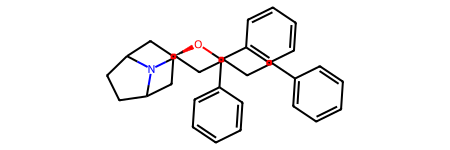

In [8]:
transformer.scaffolds[0]

In [9]:
data['scaffold_smiles'] = transformer._create_smiles_from_mol()

In [10]:
data['scaffold_ids'] = transformer.get_unique_scaffold_ids()

In [11]:
data['scaffold_ids'].head()

0     86
1     78
2    153
3    102
4    158
Name: scaffold_ids, dtype: int64

In [16]:
len(data['scaffold_ids'].unique())

161

In [12]:
data['scaffold_smiles']

0      c1ccc(CCCCCN2C3CCC2CC(OC(c2ccccc2)c2ccccc2)C3)cc1
1                               c1ccc(C2CNCc3ccncc32)cc1
2                         c1ccc2cc(CN[C@@H]3CCNC3)ccc2c1
3                     c1ccc(CNc2c3c(nc4ccccc24)CCCC3)cc1
4                               c1cncc(OC[C@@H]2CCNC2)c1
                             ...                        
195                  c1ccc(-c2nnn(Cc3ccc4ccccc4c3)n2)cc1
196                       c1ccc(OC(c2ccccc2)C2CCCNC2)cc1
197    c1cnn(-c2ccc([C@@H]3CN4CCC[C@@H]4c4cc(OCCCN5CC...
198                        c1ccc(C2[C@H]3CNC[C@@H]23)cc1
199                        c1ccc(C(c2ccccc2)c2ccncc2)cc1
Name: scaffold_smiles, Length: 200, dtype: object